# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import matplotlib.pyplot as plt # ploting library
import seaborn as sns # ploting library
color = sns.color_palette() # for coloring plot

# Reading data 

In [2]:
train = pd.read_csv('train.csv') # reading train file into a dataframe
test = pd.read_csv('test.csv') #
train.drop_duplicates(inplace=True)
train.dropna(inplace=True)
df_all = pd.concat((train, test))
df_all['question1'].fillna('', inplace=True)
df_all['question2'].fillna('', inplace=True)
print('Total number of question in testing set: {}'.format(len(train)))
print('Total number of question in training set: {}'.format(len(test)))

Total number of question in testing set: 404288
Total number of question in training set: 2345796


In [3]:
train.head(5) #  this will give the column name and first row of the dataframe

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


The data has 5 columns:

    id:  normal indexing of data
    qid1, qid2: id of questions (numberic data)
    question1, question2: Quora questions(String data)
    is_duplicate: classification class 


In [4]:
train.info() # detailed info of dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404288 entries, 0 to 404289
Data columns (total 6 columns):
id              404288 non-null int64
qid1            404288 non-null int64
qid2            404288 non-null int64
question1       404288 non-null object
question2       404288 non-null object
is_duplicate    404288 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


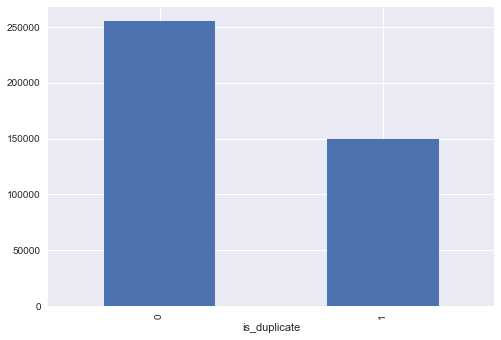

In [5]:
train.groupby("is_duplicate")['id'].count().plot.bar()
plt.show()

This knowledge is used to develop the benchmark model and gives the insights of the dataset. As we can see that majorly questions are not duplicate.  

In [6]:
print('Percentage of duplicate pairs: {}%'.format((train['is_duplicate'].mean()*100)))
print('Total number of question pairs for training: {}'.format(len(train)))
print('Duplicate pairs: {}%'.format(round(train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Percentage of duplicate pairs: 36.9199679436%
Total number of question pairs for training: 404288
Duplicate pairs: 36.92%
Total number of questions in the training data: 537931
Number of questions that appear multiple times: 111778


    Data contains abbreviations, punctuation and numbers . I've replaced them with full forms and empty string. 
    I haven't removed any stop words yet from the dataset.

# Removing abbreviations and other irrelevant things

In [7]:
punctuation='["\'?,\.]'
abbreviation_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
      "[^A-Za-z0-9]": " ",
      "what's": "",  
      "What's": "",  
      "\'s": " ",  
      "\'ve": " have ",  
      "can't": "cannot ",  
      "n't": " not ",  
      "I'm": "I am",  
      " m ": " am ",  
      "\'re": " are ",  
      "\'d": " would ",  
      "\'ll": " will ",  
      "60k": " 60000 ",  
      " e g ": " eg ",  
      " b g ": " bg ",  
      "\0s": "0",  
      " 9 11 ": "911",  
      "e-mail": "email",  
      "\s{2,}": " ",  
      "quikly": "quickly",  
      " usa ": " America ",  
      " USA ": " America ",  
      " u s ": " America ",  
      " uk ": " England ",  
      " UK ": " England ",  
      "india": "India",  
      "switzerland": "Switzerland",  
      "china": "China",  
      "chinese": "Chinese",   
      "imrovement": "improvement",  
      "intially": "initially",  
      "quora": "Quora",  
      " dms ": "direct messages ",    
      "demonitization": "demonetization",   
      "actived": "active",  
      "kms": " kilometers ",  
      "KMs": " kilometers ",  
      " cs ": " computer science ",   
      " upvotes ": " up votes ",  
      " iPhone ":" phone ",  
      "\0rs ": " rs ",   
      "calender": "calendar",  
      "ios": "operating system",  
      "gps": "GPS",  
      "gst": "GST",  
      "programing": "programming",  
      "bestfriend": "best friend",  
      "dna": "DNA",  
      "III": "3",   
      "the US": "America",  
      "Astrology": "astrology",  
      "Method": "method",  
      "Find": "find",   
      "banglore": "Banglore",  
      " J K ": " JK ",  
    
}

def abbreviation_remover(data):
    data.question1 = data.question1.str.lower()
    data.question2 = data.question1.str.lower()
    data.question1 = data.question1.astype(str)
    data.question2=data.question2.astype(str)
    data.replace(abbreviation_dict, regex=True, inplace=True)
    return data
train = abbreviation_remover(train)

In [8]:
test = abbreviation_remover(test)

In [9]:
all_qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
print('Questions in the training data: {}'.format(len(np.unique(all_qids))))
print('Questions that appear multiple times: {}'.format(np.sum(all_qids.value_counts() > 1)))

Questions in the training data: 537931
Questions that appear multiple times: 111778


    Appling thr TFIDF(term frequency-inverse document frequency). This algorihtm is used for assigning the weight. 
    This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Distribution of train and test dataset

In [11]:
train_questions = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
test_questions = pd.Series(test['question1'].tolist() + test['question2'].tolist()).astype(str)
train_length = train_questions.apply(len)
test_length = test_questions.apply(len)

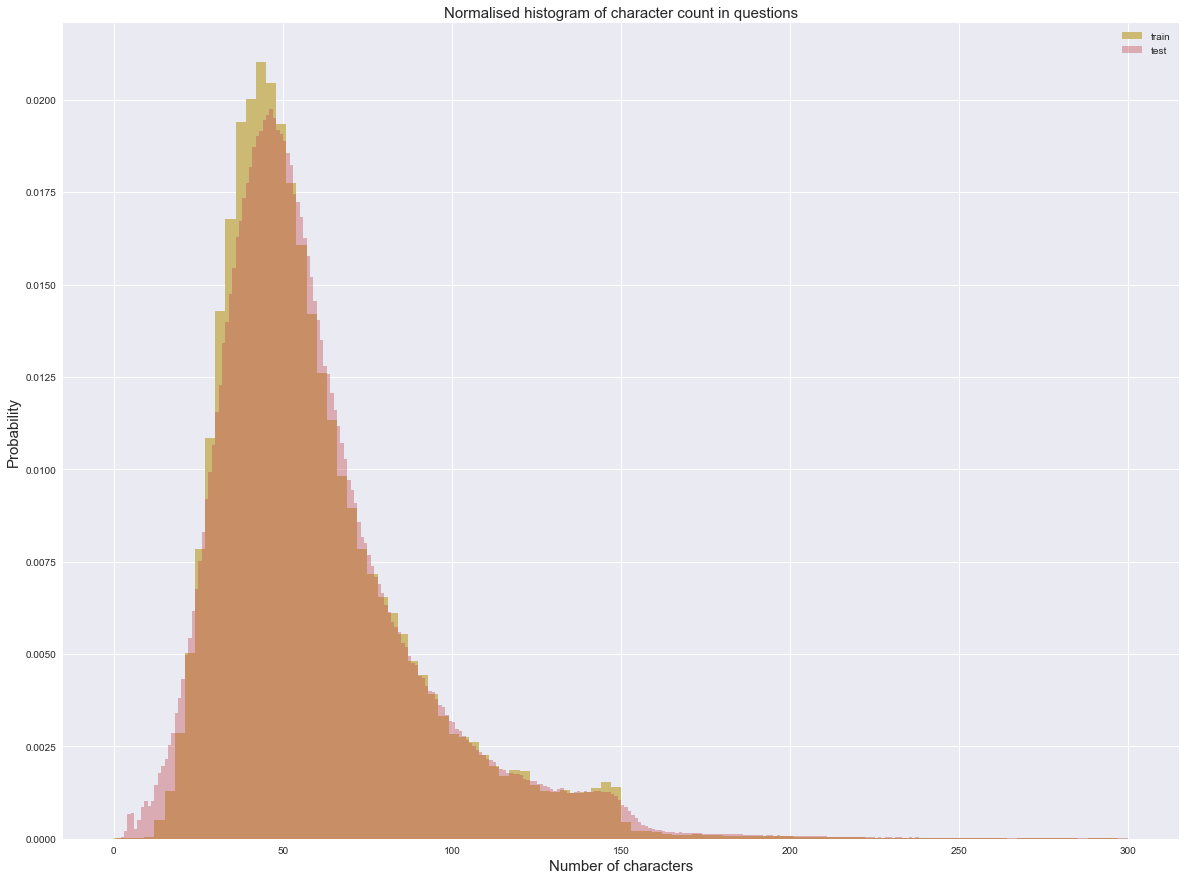

In [12]:
plt.figure(figsize=(20,15))
plt.hist(train_length, bins=100, range=[0, 300], color=color[4], normed=True, label='train')
plt.hist(test_length, bins=300, range=[0, 300], color=color[2], normed=True, alpha=0.4, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [13]:
plt.show()

Most questions have anywhere from 15 to 150 characters in them. It seems that the test distribution is a little different from the train one, but not too much. Thier is a  steep cut-off at 150 characters for the training set, for most questions, while the test set slowly decreases after 150. This could be some sort of Quora question size limit

In [14]:
print(train_length.describe())
print(test_length.describe())

count    808576.000000
mean         59.177074
std          29.484540
min           1.000000
25%          39.000000
50%          52.000000
75%          71.000000
max         603.000000
dtype: float64
count    4.691592e+06
mean     5.972441e+01
std      3.082464e+01
min      1.000000e+00
25%      4.000000e+01
50%      5.300000e+01
75%      7.200000e+01
max      1.144000e+03
dtype: float64


# Benchmark Model

I used the previous information from the dataset to create a naive benchmark model by taking the mean value.

In [15]:
from sklearn.metrics import log_loss

quora_mean = train['is_duplicate'].mean()

print 'Benchmark model predictes score:', log_loss(train['is_duplicate'],np.zeros_like(train['is_duplicate']) + quora_mean)

Benchmark model predictes score: 0.658528362311


# TFIDF

In [16]:
trainq1, trainq2 = train[['qid1', 'question1']], train[['qid2', 'question2']]
trainq1.columns = ['qid1', 'question']
trainq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
train_questions = pd.concat((trainq1, trainq2), axis=0).fillna("")
nrows_for_q1 = train.shape[0]/2
train_questions.shape

(808576, 3)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
mq1 = TfidfVectorizer(max_features = 256).fit_transform(train_questions['question'].values)

In [18]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=stop)
vect.fit(train.question1+train.question2)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd'...ost', u'such', u'why', u'a', u'off', u'i', u'm', u'yours', u'so', u'y', u'the', u'having', u'once']),
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
tfidf_q1 = vect.transform(train.question1)
print tfidf_q1.shape
tfidf_q2 = vect.transform(train.question2)

(404288, 67991)


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = []
for i in range(404288):
    cosine.append(cosine_similarity(tfidf_q1[i], tfidf_q2[i]))

### Creating copy of original dataframe


In [22]:
train_copy = train.copy()

In [23]:
from nltk import word_tokenize
def quora_tokenizer(data):
    tokens = word_tokenize(data)
    return tokens


In [24]:
train_copy['q1len'] = train['question1'].str.len()
train_copy['q2len'] = train['question2'].str.len()

train_copy['q1_n_words'] = train['question1'].apply(lambda row: len(quora_tokenizer(row)))


In [25]:
train_copy['q2_n_words'] = train['question2'].apply(lambda row: len(quora_tokenizer(row)))

In [26]:
train_copy['cosine_similarity'] = cosine

In [27]:
def word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


train_copy['word_share'] = train.apply(word_share, axis=1)

In [28]:
train_copy.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,cosine_similarity,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,66,14,14,[[1.0]],0.5


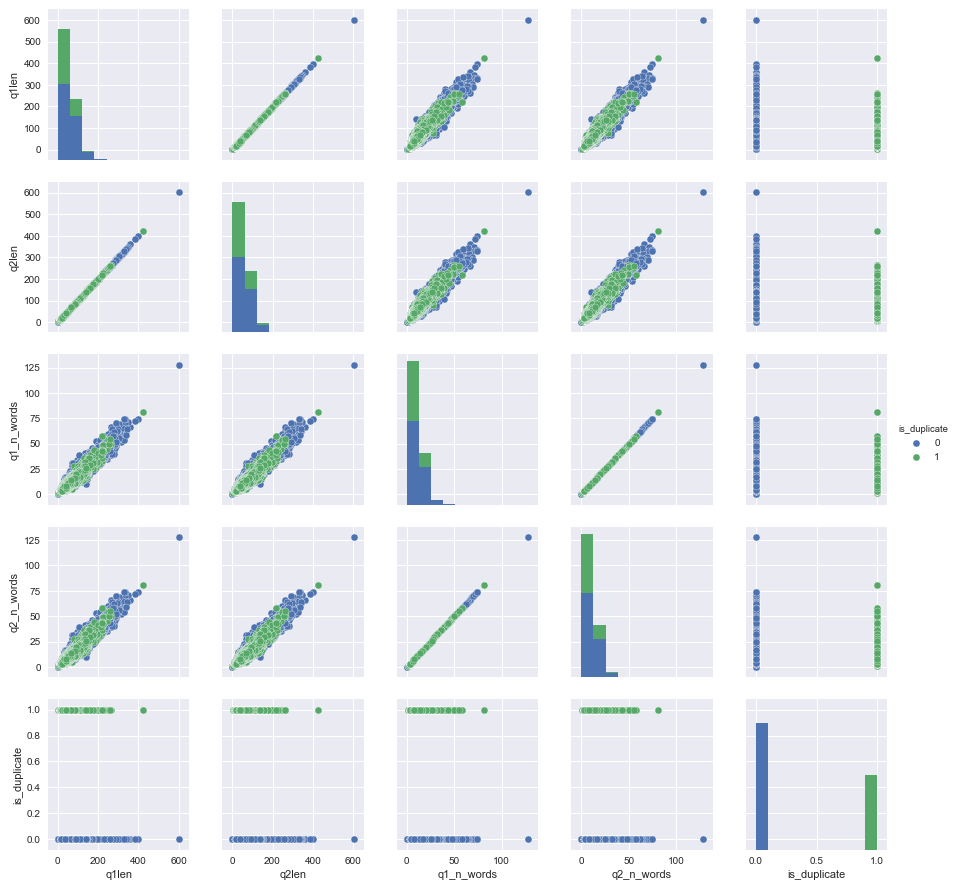

In [29]:
n = 404288
sns.pairplot(train_copy[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'is_duplicate']][0:n], hue='is_duplicate')

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler().fit(train_copy[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share','cosine_similarity']])

features = scaler.transform(train_copy[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share','cosine_similarity']])
target = train_copy['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [32]:
clf = LogisticRegression()
param_grid = { 
    
    'C' : [1.0,2.0],
    'penalty': ['l1','l2'],
    'tol': [1e-6, 1e-3] 
    
}
cv = GridSearchCV(clf, param_grid)
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1.0, 2.0], 'tol': [1e-06, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
predict = cv.predict(X_test)

In [34]:
print('Logistic Regression with TFIDF Log loss:', log_loss(y_test,predict))

('Logistic Regression with TFIDF Log loss:', 12.922251761271001)


# Word2Vector 

In [35]:
import nltk

from gensim.models import word2vec
STOP_WORDS = nltk.corpus.stopwords.words()

C:\Users\Prakritidev Verma\Anaconda3\envs\py27\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [36]:
corpus = []
for col in ['question1', 'question2']:
    for sentence in train[col].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)

In [37]:
corpus[0:2]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'India',
  ''],
 ['what',
  'is',
  'the',
  'story',
  'of',
  'kohinoor',
  'koh',
  'i',
  'noor',
  'diamond',
  '']]

In [38]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['India']

array([-0.13404834,  0.11146973, -0.08771309,  0.87687832,  2.18845463,
       -1.06473434,  0.59557521, -0.62128735,  0.29000029,  0.43910381,
       -0.7792908 , -3.93932199,  1.64127207,  0.7010693 ,  1.35151982,
        0.78764802, -2.43882394, -0.32177493,  0.12481856, -2.71851587,
       -1.05906022,  2.75442433, -1.49819779,  2.70180202, -0.97260356,
        2.12468219,  0.68445396, -0.87301439,  0.71556729,  2.13367343,
        0.66288656,  3.55262327, -0.42981261,  0.44671202,  2.55966592,
       -1.28447807, -1.95008969, -0.0501285 , -0.42179257, -0.74545592,
       -0.66255891,  0.1821124 , -0.12212329,  0.58353806,  1.54218721,
        0.6322391 , -0.24162148, -0.62870711, -1.87751007,  0.47807619,
        0.18488102,  0.38122866,  1.64673424, -0.78431433,  1.89885807,
        0.36379957, -1.30581725,  0.43835074, -0.17545146, -1.64442062,
       -0.96906495,  0.43220112, -0.45618102, -1.1384325 ,  1.16589093,
       -1.85246551,  1.00150311,  0.08058935,  1.35605633, -2.20

# TNSE plotting

In [39]:
from sklearn.manifold import TSNE
def dataplot(data):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

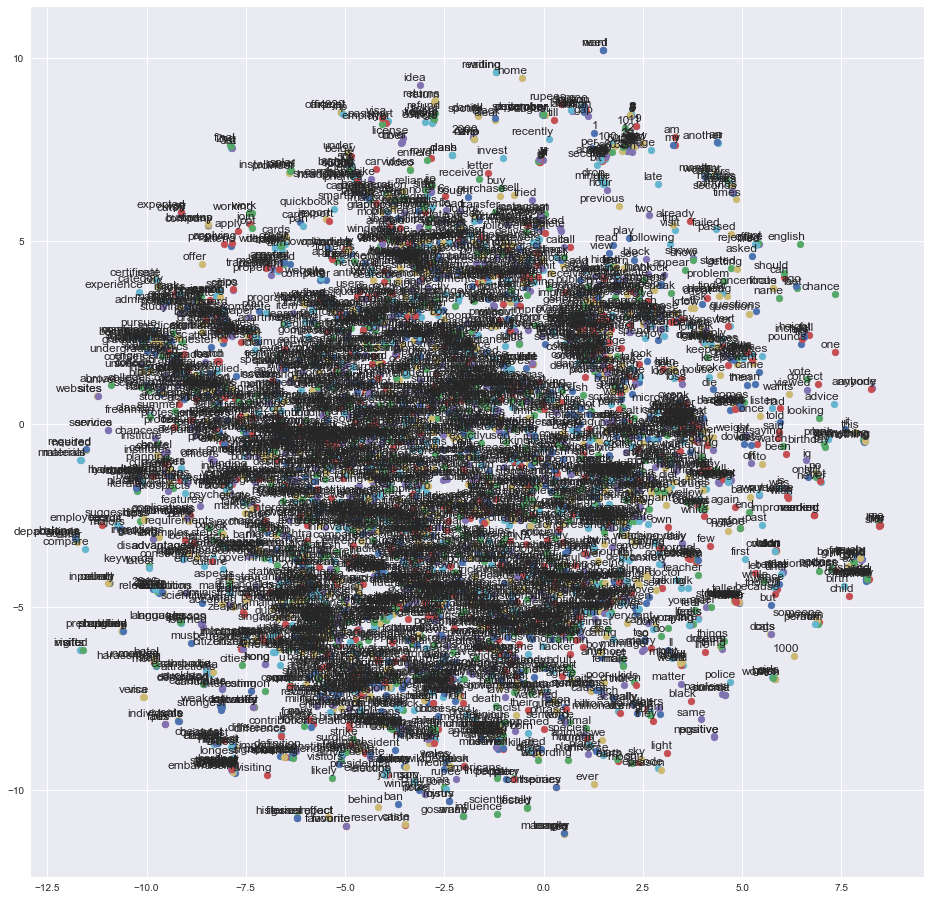

In [40]:
dataplot(model)

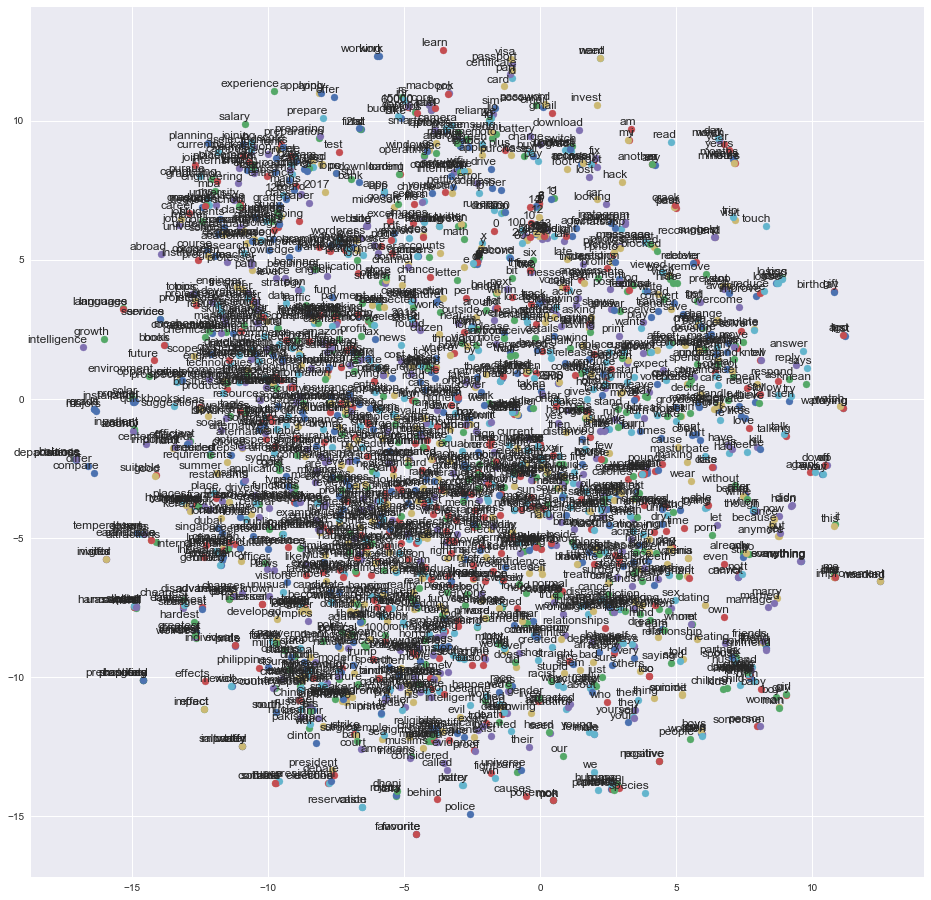

In [41]:
model = word2vec.Word2Vec(corpus, size=100, window=50, min_count=400, workers=4)
dataplot(model)

In [42]:
model.most_similar('trump')

[('hillary', 0.5408129096031189),
 ('obama', 0.5052508115768433),
 ('president', 0.49948230385780334),
 ('presidential', 0.4518161416053772),
 ('bill', 0.4429060220718384),
 ('elections', 0.3981578052043915),
 ('russia', 0.3955112099647522),
 ('America', 0.3899218440055847),
 ('u', 0.38562896847724915),
 ('election', 0.37948504090309143)]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import itertools

In [44]:
counts_vectorizer = CountVectorizer(max_features=10000-1).fit(
    itertools.chain(df_all['question1'], df_all['question2']))
other_index = len(counts_vectorizer.vocabulary_)

In [45]:
import re
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Using Theano backend.


In [46]:
words_tokenizer = re.compile(counts_vectorizer.token_pattern)

In [47]:
def create_padded_seqs(texts, max_len=10):
    seqs = texts.apply(lambda s: 
        [counts_vectorizer.vocabulary_[w] if w in counts_vectorizer.vocabulary_ else other_index
         for w in words_tokenizer.findall(s.lower())])
    return pad_sequences(seqs, maxlen=max_len)

In [48]:
df_all = df_all.sample(1000)

In [49]:
X1_train, X1_val, X2_train, X2_val, y_train, y_val = \
    train_test_split(create_padded_seqs(df_all[df_all['id'].notnull()]['question1']), 
                     create_padded_seqs(df_all[df_all['id'].notnull()]['question2']),
                     df_all[df_all['id'].notnull()]['is_duplicate'].values,
                     stratify=df_all[df_all['id'].notnull()]['is_duplicate'].values,
                     test_size=0.3, random_state=0)

#  LSTM using KERAS

In [50]:
import keras.layers as lyr
from keras.models import Model

In [51]:
input1_tensor = lyr.Input(X1_train.shape[1:])
input2_tensor = lyr.Input(X2_train.shape[1:])

words_embedding_layer = lyr.Embedding(X1_train.max() + 1, 100)
seq_embedding_layer = lyr.LSTM(256, activation='tanh')

seq_embedding = lambda tensor: seq_embedding_layer(words_embedding_layer(tensor))

merge_layer = lyr.multiply([seq_embedding(input1_tensor), seq_embedding(input2_tensor)])

dense1_layer = lyr.Dense(16, activation='sigmoid')(merge_layer)
ouput_layer = lyr.Dense(1, activation='sigmoid')(dense1_layer)

model = Model([input1_tensor, input2_tensor], ouput_layer)

model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 10L)           0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 10L)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 10L, 100)      1000000     input_1[0][0]                    
                                                                   input_2[0][0]                    
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 256)           365568      embedding_1[0][0]       

In [52]:
model.fit([X1_train, X2_train], y_train, 
          validation_data=([X1_val, X2_val], y_val), 
          batch_size=128, epochs=6, verbose=2)

ImportError: ('The following error happened while compiling the node', Elemwise{Composite{((i0 * log(Composite{clip(scalar_sigmoid((i0 + i1)), i2, i3)}(i1, i2, i3, i4))) + ((i5 - i0) * log1p((-Composite{clip(scalar_sigmoid((i0 + i1)), i2, i3)}(i1, i2, i3, i4)))))}}[(0, 1)](/dense_2_target, Dot22.0, InplaceDimShuffle{x,0}.0, TensorConstant{(1L, 1L) of 1e-07}, TensorConstant{(1L, 1L) of 1.0}, TensorConstant{(1L, 1L) of 1.0}), '\n', 'DLL load failed: The specified procedure could not be found.')

In [53]:
features_model = Model([input1_tensor, input2_tensor], merge_layer)


In [54]:
F_train = features_model.predict([X1_train, X2_train], batch_size=128)
F_val = features_model.predict([X1_val, X2_val], batch_size=128)

# XGboost

In [55]:
import xgboost as xgb

dTrain = xgb.DMatrix(F_train, label=y_train)
dVal = xgb.DMatrix(F_val, label=y_val)

In [56]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 3



watchlist = [(dTrain, 'train'), (dVal, 'valid')]

bst = xgb.train(params, dTrain, 500, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.681476	valid-logloss:0.68976
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.574361	valid-logloss:0.672501
[20]	train-logloss:0.493703	valid-logloss:0.649249
[30]	train-logloss:0.429069	valid-logloss:0.641674
[40]	train-logloss:0.376184	valid-logloss:0.636595
[50]	train-logloss:0.334335	valid-logloss:0.62268
[60]	train-logloss:0.299904	valid-logloss:0.614213
[70]	train-logloss:0.270233	valid-logloss:0.608225
[80]	train-logloss:0.245061	valid-logloss:0.602045
[90]	train-logloss:0.224111	valid-logloss:0.599815
[100]	train-logloss:0.2035	valid-logloss:0.604305
[110]	train-logloss:0.186485	valid-logloss:0.612097
[120]	train-logloss:0.171078	valid-logloss:0.622039
[130]	train-logloss:0.157037	valid-logloss:0.632306
[140]	train-logloss:0.144523	valid-logloss:0.643829
Stopping. Best iteration:
[94]	train-logloss:0.215172	valid-logloss:0.59901



### Train-logloss:0.169337	Valid-logloss:0.628098

In [57]:
X1_test = create_padded_seqs(df_all[df_all['test_id'].notnull()]['question1'])
X2_test = create_padded_seqs(df_all[df_all['test_id'].notnull()]['question2'])

In [58]:
F_test = features_model.predict([X1_test, X2_test], batch_size=128)

In [59]:
dTest = xgb.DMatrix(F_test)

In [60]:
df_sub = pd.DataFrame({
        'test_id': df_all[df_all['test_id'].notnull()]['test_id'].values,
        'is_duplicate': bst.predict(dTest, ntree_limit=bst.best_ntree_limit)
    }).set_index('test_id')